In [53]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import *
from pylab import *


In [54]:
data = pd.read_csv("feat_25.csv", header=None)
data1 = pd.read_csv("feat_25.csv",header=None)

In [55]:
data.shape

(3000, 26)

In [76]:
print(data.describe())
labels = list(data[:26])
data = data.iloc[0:,:25]
data1 = data1.iloc[0:, :25]
data1 = np.array(data1)


                 0             1             2            3             4   \
count  3.000000e+03  3.000000e+03  3.000000e+03  3000.000000  3.000000e+03   
mean  -1.042129e-16  1.705303e-16  3.789561e-17     0.000000 -1.610564e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00     1.000000  1.000000e+00   
min   -1.786158e+00 -2.242103e+00 -2.668996e+00    -2.895824 -2.966701e+00   
25%   -6.943629e-01 -7.462051e-01 -7.095814e-01    -0.729067 -6.573159e-01   
50%   -1.220199e-01 -1.370818e-01 -2.845230e-02    -0.024244  3.015736e-02   
75%    5.556375e-01  7.424024e-01  6.395252e-01     0.655966  6.730063e-01   
max    4.094694e+00  2.787466e+00  3.131397e+00     3.379181  3.022150e+00   

                 5             6             7             8             9   \
count  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03   
mean  -3.789561e-17 -9.473903e-17  5.684342e-17  1.894781e-16  8.526513e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+0

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [65]:
pca = PCA()
pca.fit(data)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_))
print(len(pca.explained_variance_ratio_))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
25
25


In [66]:
q=float(0)
j =0

p=pca.explained_variance_ratio_
for i in p:
    if(q<0.90):
        q = q+i
        j = np.where(p == i)


print(q)
print(j)


0.9200000000000003
(array([22, 23, 24], dtype=int64),)


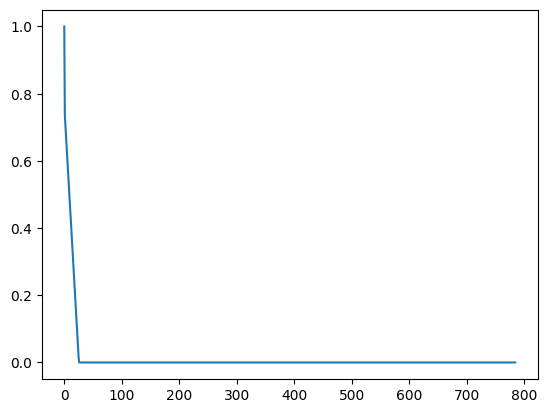

In [42]:
res_var = [1]
for i in range(1,785):
    res_var = res_var + [1.0 -sum(p[:i])]
plt.plot(range(785),res_var)
plt.show()


In [78]:
clf = KMeans(n_clusters=10, n_init=10, max_iter=100)
clf.fit(data)
pred = clf.predict(data)
print(pred)


[3 3 9 ... 1 0 0]


In [79]:
cluster_dict ={}

for i,val in enumerate(pred):
    if(val not in cluster_dict.keys()):
        cluster_dict[val]= []
    cluster_dict[val] = cluster_dict[val] + [i]

print(cluster_dict.keys())


dict_keys([3, 9, 5, 6, 7, 2, 0, 8, 4, 1])


In [69]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
pca = PCA(n_components=25, random_state=0)
train_pca = pca.fit_transform(data)


In [70]:
#Transform the data
df = pca.fit_transform(data)

[2 2 9 ... 7 5 5]


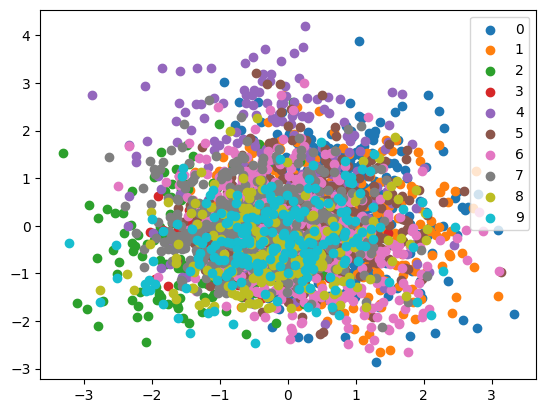

In [71]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
pred_label = kmeans.fit_predict(df)
print (pred_label)
 
#Getting unique labels
u_labels = np.unique(pred_label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[pred_label == i , 0] , df[pred_label == i , 1] , label = i)
plt.legend()
plt.show()

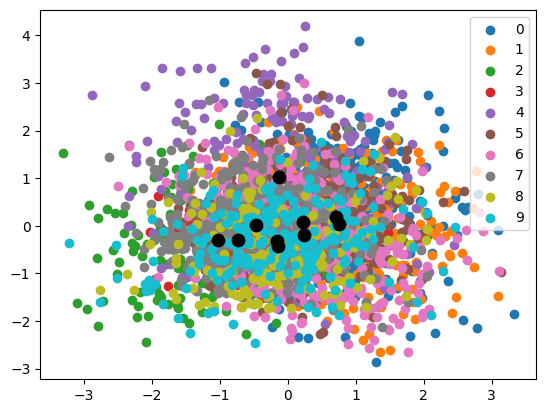

In [72]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(pred_label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[pred_label == i , 0] , df[pred_label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()